<a href="https://colab.research.google.com/github/marygizem/-Machine-Learning-and-Predictive-Analytics/blob/main/MO_IT134_Draft_of_Milestone_2_Project_Forecasting_Model_with_DataViz_BSIT_S3101_Ramos_M_G%2C_Decastillo_P_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup: unzip project + imports

In [ ]:
import zipfile
import os

zip_path = "-Machine-Learning-and-Predictive-Analytics-main.zip"
extract_path = "finmark_project"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted!")

Files extracted!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.style.use("seaborn-v0_8")

 ##Load the preprocessed dataset

Merged dataset to contain:
- Transaction: `Transaction_ID`, `Transaction_Date`, `Quantity`
- Keys: `Company_ID`, `Product_ID`
- Price: `Product_Price_x` (numeric)
- Metadata: company/product fields


In [ ]:
file_path = "finmark_project/-Machine-Learning-and-Predictive-Analytics-main/merged_data.csv"

df = pd.read_csv(file_path)

df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


In [ ]:
file_path = "finmark_project/-Machine-Learning-and-Predictive-Analytics-main/merged_data.csv"

df = pd.read_csv(file_path)

df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


##Cleaning + target variable

In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Unit_Price'] = pd.to_numeric(df['Product_Price_x'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df['Revenue'] = df['Unit_Price'] * df['Quantity']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    5329 non-null   float64       
 1   Company_ID        5329 non-null   float64       
 2   Product_ID        5329 non-null   float64       
 3   Quantity          5329 non-null   float64       
 4   Transaction_Date  5329 non-null   datetime64[ns]
 5   Product_Price_x   5329 non-null   float64       
 6   Total_Cost        5329 non-null   float64       
 7   Company_Name      4793 non-null   object        
 8   Company_Profit    4181 non-null   float64       
 9   Address           4793 non-null   object        
 10  Product_Name      4799 non-null   object        
 11  Product_Price_y   4799 non-null   object        
 12  Unit_Price        5329 non-null   float64       
 13  Revenue           5329 non-null   float64       
dtypes: datetime64[ns](1), fl

## Feature engineering

### 3.1 Calendar / seasonality
### 3.2 Recency & momentum
### 3.3 Customer & product value


In [ ]:
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['Quarter'] = df['Transaction_Date'].dt.quarter
df['DayOfWeek'] = df['Transaction_Date'].dt.dayofweek
df['Is_Weekend'] = (df['DayOfWeek'] >= 5).astype(int)

In [ ]:
# Always do this first to avoid duplicate-index alignment issues
df = df.sort_values(['Company_ID', 'Transaction_Date', 'Transaction_ID']).reset_index(drop=True)

company_roll = (
    df.groupby('Company_ID')
      .rolling('30D', on='Transaction_Date')['Revenue']
      .sum()
      .reset_index(level=0, drop=True)
)

# Assign by position (no index alignment)
df['Company_30D_Revenue_Rolling'] = company_roll.to_numpy()

## Monthly aggregation (forecast target)


In [ ]:
df = df.sort_values(['Product_ID', 'Transaction_Date', 'Transaction_ID']).reset_index(drop=True)

product_roll = (
    df.groupby('Product_ID')
      .rolling('30D', on='Transaction_Date')['Quantity']
      .sum()
      .reset_index(level=0, drop=True)
)

df['Product_30D_Quantity_Rolling'] = product_roll.to_numpy()

In [ ]:
df[['Company_ID','Transaction_Date','Revenue','Company_30D_Revenue_Rolling']].head(10)

,Company_ID,Transaction_Date,Revenue,Company_30D_Revenue_Rolling
0,30.0,2020-11-05,1.525989e+06,1.525989e+06
1,64.0,2020-11-12,1.422961e+06,1.422961e+06
2,54.0,2020-11-22,7.823757e+05,7.823757e+05
3,85.0,2020-11-24,1.125430e+06,1.125430e+06
4,26.0,2021-01-04,8.387205e+05,8.387205e+05
5,2.0,2021-01-15,6.761370e+05,6.761370e+05
6,38.0,2021-02-08,3.962073e+05,6.598328e+05
7,36.0,2021-02-21,5.647441e+05,1.381004e+06
8,72.0,2021-02-21,9.150790e+05,9.150790e+05
9,70.0,2021-02-21,1.021440e+06,2.759705e+06


In [ ]:
monthly = (
    df.set_index('Transaction_Date')
      .resample('MS')
      .agg({
          'Revenue': 'sum',
          'Quantity': 'sum',
          'Transaction_ID': 'count'
      })
)

monthly.head()

,Revenue,Quantity,Transaction_ID
Transaction_Date,,,
2020-10-01,4.601156e+06,32.0,3
2020-11-01,4.903053e+07,368.0,33
2020-12-01,2.940578e+07,204.0,21
2021-01-01,4.813537e+07,347.0,35
2021-02-01,5.697238e+09,41954.0,3999


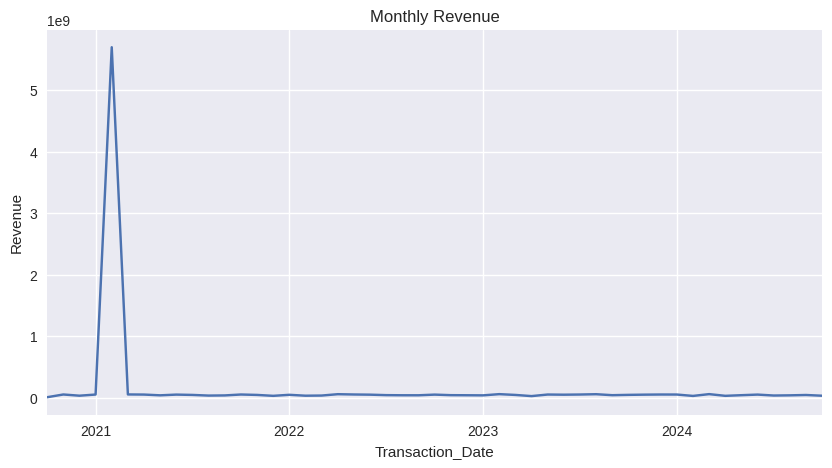

In [ ]:
plt.figure(figsize=(10,5))
monthly['Revenue'].plot()
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.show()

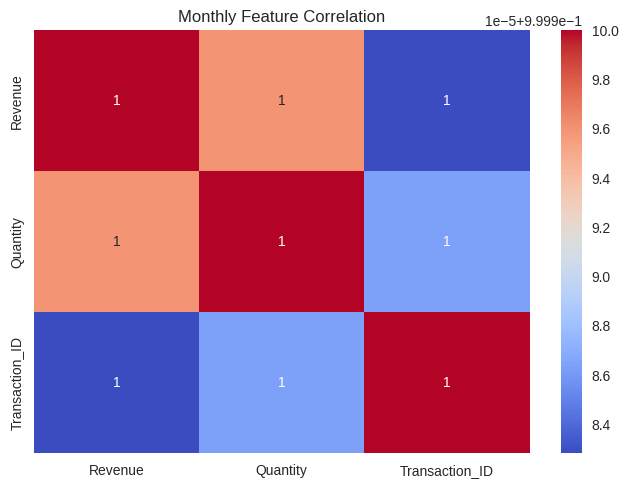

In [ ]:
sns.heatmap(monthly.corr(), annot=True, cmap="coolwarm")
plt.title("Monthly Feature Correlation")
plt.show()

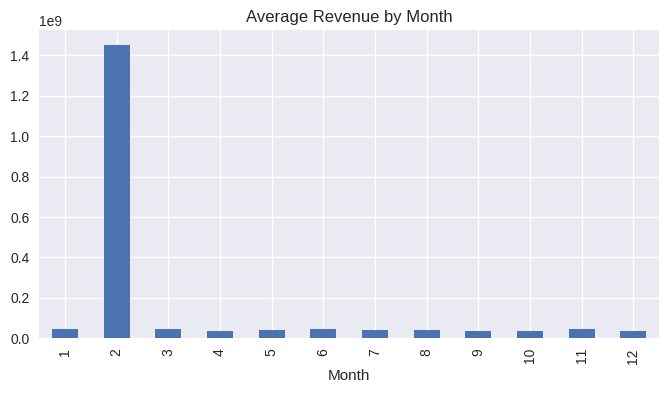

In [ ]:
monthly['Month'] = monthly.index.month

seasonality = monthly.groupby('Month')['Revenue'].mean()

seasonality.plot(kind='bar', figsize=(8,4))
plt.title("Average Revenue by Month")
plt.show()

## Forecasting model (SARIMAX) + quick backtest


In [ ]:
monthly['Log_Revenue'] = np.log1p(monthly['Revenue'])

model = SARIMAX(
    monthly['Log_Revenue'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

forecast = results.get_forecast(steps=3)
pred_log = forecast.predicted_mean
pred = np.expm1(pred_log)

pred

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


,predicted_mean
2024-11-01,4.276138e+07
2024-12-01,3.698219e+07
2025-01-01,3.972633e+07


##3 months Forecast

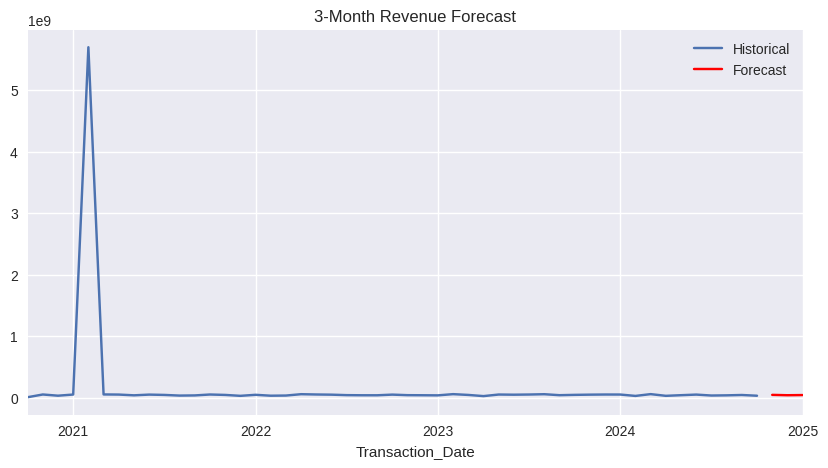

In [ ]:
plt.figure(figsize=(10,5))
monthly['Revenue'].plot(label="Historical")
pred.plot(label="Forecast", color="red")
plt.legend()
plt.title("3-Month Revenue Forecast")
plt.show()

In [ ]:
df.to_csv("finmark_with_features.csv", index=False)

In [ ]:
pred.to_csv("3_month_forecast.csv")

In [3]:
import os

print(os.listdir())

['.config', '-Machine-Learning-and-Predictive-Analytics-main.zip', 'sample_data']


In [4]:
import zipfile

zip_path = "-Machine-Learning-and-Predictive-Analytics-main.zip"
extract_path = "finmark_project"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Unzipped!")

Unzipped!


In [5]:
print(os.listdir("finmark_project"))

['-Machine-Learning-and-Predictive-Analytics-main']


In [6]:
file_path = "finmark_project/-Machine-Learning-and-Predictive-Analytics-main/merged_data.csv"
df = pd.read_csv(file_path)
df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


In [12]:
!pip -q install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rcParams["figure.figsize"] = (12, 5)

In [13]:
df = pd.read_csv("merged_data.csv")
df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


In [14]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors="coerce")

# Week 8 column naming
df["Unit_Price"] = pd.to_numeric(df["Product_Price_x"], errors="coerce")
df["Quantity"]   = pd.to_numeric(df["Quantity"], errors="coerce")

df["Revenue"] = df["Quantity"] * df["Unit_Price"]

df = df.dropna(subset=["Transaction_Date", "Revenue"]).copy()
df = df[df["Revenue"] >= 0]

In [16]:
df.columns.tolist()

['Transaction_ID',
 'Company_ID',
 'Product_ID',
 'Quantity',
 'Transaction_Date',
 'Product_Price_x',
 'Total_Cost',
 'Company_Name',
 'Company_Profit',
 'Address',
 'Product_Name',
 'Product_Price_y',
 'Unit_Price',
 'Revenue']

In [18]:
import pandas as pd
import numpy as np

def pick_col(df, options):
    """Return first matching column from options (case-insensitive), else None."""
    lower_map = {c.lower(): c for c in df.columns}
    for opt in options:
        if opt.lower() in lower_map:
            return lower_map[opt.lower()]
    return None

# Try to detect columns automatically
col_txn_date = pick_col(df, ["Transaction_Date", "transaction_date", "Date", "order_date"])
col_txn_id   = pick_col(df, ["Transaction_ID", "transaction_id", "Invoice_ID", "order_id"])
col_prod_id  = pick_col(df, ["Product_ID", "product_id", "SKU", "Item_ID"])
col_cust_id  = pick_col(df, ["Customer_ID", "customer_id", "Client_ID", "client_id", "Buyer_ID"])

print("Detected columns:")
print("Transaction_Date:", col_txn_date)
print("Transaction_ID  :", col_txn_id)
print("Product_ID      :", col_prod_id)
print("Customer_ID     :", col_cust_id)

# Ensure datetime index
df[col_txn_date] = pd.to_datetime(df[col_txn_date], errors="coerce")
df = df.dropna(subset=[col_txn_date]).copy()
df = df.set_index(col_txn_date)

agg_dict = {"Revenue": "sum"}

# only add these if they exist
if col_txn_id:
    agg_dict[col_txn_id] = "count"
if col_prod_id:
    agg_dict[col_prod_id] = pd.Series.nunique
if col_cust_id:
    agg_dict[col_cust_id] = pd.Series.nunique

monthly = df.resample("MS").agg(agg_dict)

# Rename to consistent names (so later code is clean)
rename_map = {"Revenue": "Revenue"}
if col_txn_id:  rename_map[col_txn_id]  = "Transactions"
if col_prod_id: rename_map[col_prod_id] = "Unique_Products"
if col_cust_id: rename_map[col_cust_id] = "Unique_Customers"

monthly = monthly.rename(columns=rename_map)

# Add time features
monthly["MonthNum"] = monthly.index.month
monthly["Quarter"]  = monthly.index.quarter
monthly["Year"]     = monthly.index.year

monthly.head()

Detected columns:
Transaction_Date: Transaction_Date
Transaction_ID  : Transaction_ID
Product_ID      : Product_ID
Customer_ID     : None


,Revenue,Transactions,Unique_Products,MonthNum,Quarter,Year
Transaction_Date,,,,,,
2020-10-01,4.601156e+06,3,3,10,4,2020
2020-11-01,4.903053e+07,33,16,11,4,2020
2020-12-01,2.940578e+07,21,12,12,4,2020
2021-01-01,4.813537e+07,35,18,1,1,2021
2021-02-01,5.697238e+09,3999,20,2,1,2021


## Visualization

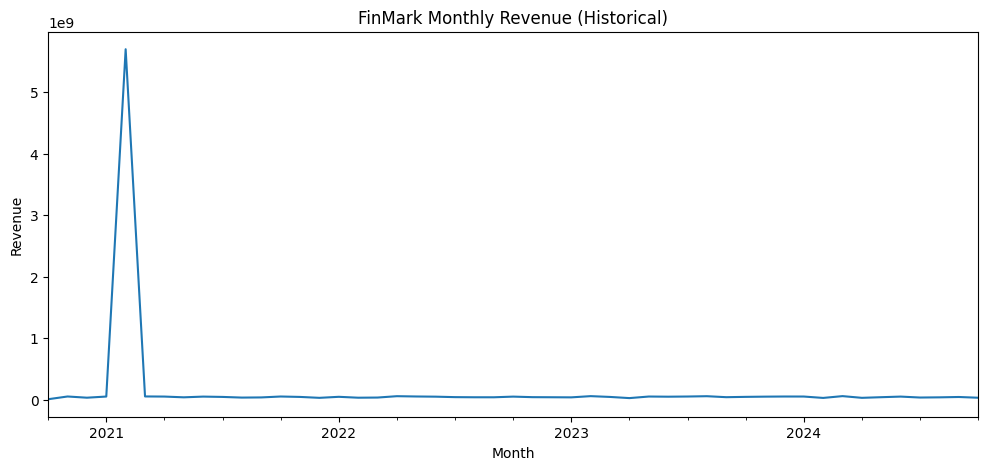

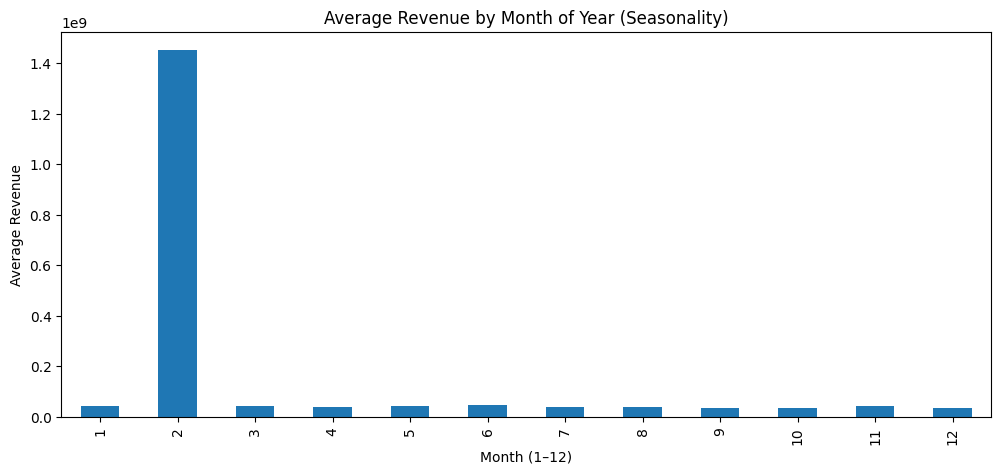

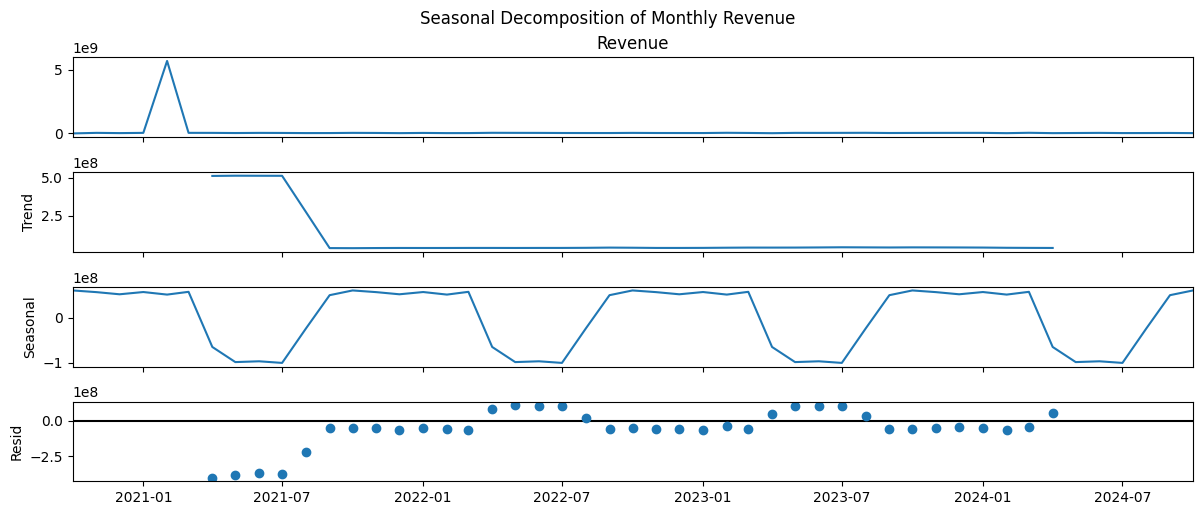

In [19]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Trend line
ax = monthly["Revenue"].plot()
ax.set_title("FinMark Monthly Revenue (Historical)")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
plt.show()

# Seasonality (avg by month-of-year)
seasonality = monthly.groupby("MonthNum")["Revenue"].mean()
ax = seasonality.plot(kind="bar")
ax.set_title("Average Revenue by Month of Year (Seasonality)")
ax.set_xlabel("Month (1–12)")
ax.set_ylabel("Average Revenue")
plt.show()

# Decomposition
if len(monthly) >= 24:
    decomp = seasonal_decompose(monthly["Revenue"], model="additive", period=12)
    decomp.plot()
    plt.suptitle("Seasonal Decomposition of Monthly Revenue", y=1.02)
    plt.show()
else:
    print("Not enough months for stable decomposition (need ~24+ months).")

## Refinement: last 6 months

In [20]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")

y = np.log1p(monthly["Revenue"])  # log transform for stability

test_horizon = 6
train_y = y.iloc[:-test_horizon]
test_y  = y.iloc[-test_horizon:]

model = SARIMAX(
    train_y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

pred_log = model.get_forecast(steps=test_horizon)
pred_mean = np.expm1(pred_log.predicted_mean)
pred_ci   = np.expm1(pred_log.conf_int())

actual = monthly["Revenue"].iloc[-test_horizon:]
pred   = pred_mean.copy()
pred.index = actual.index

mae  = np.mean(np.abs(actual - pred))
rmse = np.sqrt(np.mean((actual - pred)**2))
mape = np.mean(np.abs((actual - pred) / np.maximum(actual, 1e-9))) * 100

print({"MAE": mae, "RMSE": rmse, "MAPE_%": mape})

{'MAE': np.float64(10733864.082397016), 'RMSE': np.float64(12860665.917773373), 'MAPE_%': np.float64(32.419712244194805)}


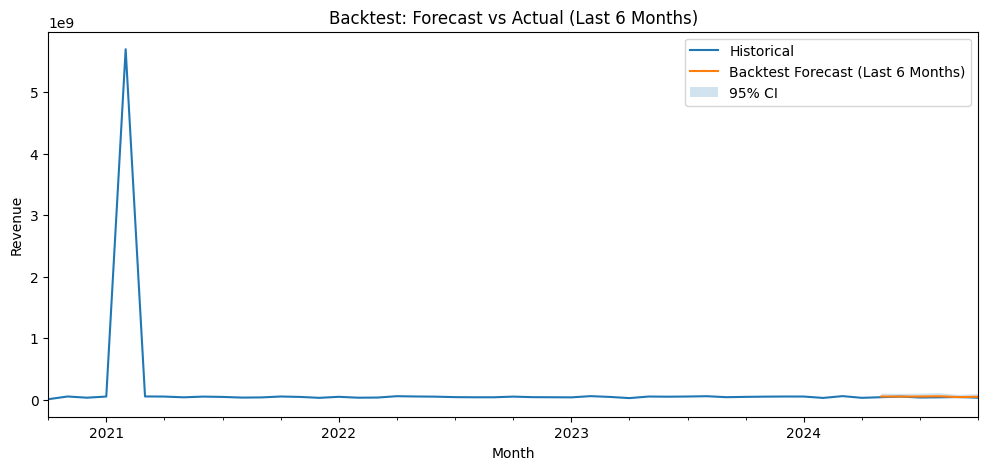

In [21]:
# Backtest plot
ax = monthly["Revenue"].plot(label="Historical")
pred.plot(ax=ax, label="Backtest Forecast (Last 6 Months)")

ax.fill_between(
    pred.index,
    pred_ci.iloc[:,0].values,
    pred_ci.iloc[:,1].values,
    alpha=0.2,
    label="95% CI"
)

ax.set_title("Backtest: Forecast vs Actual (Last 6 Months)")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
ax.legend()
plt.show()

## Residual Check

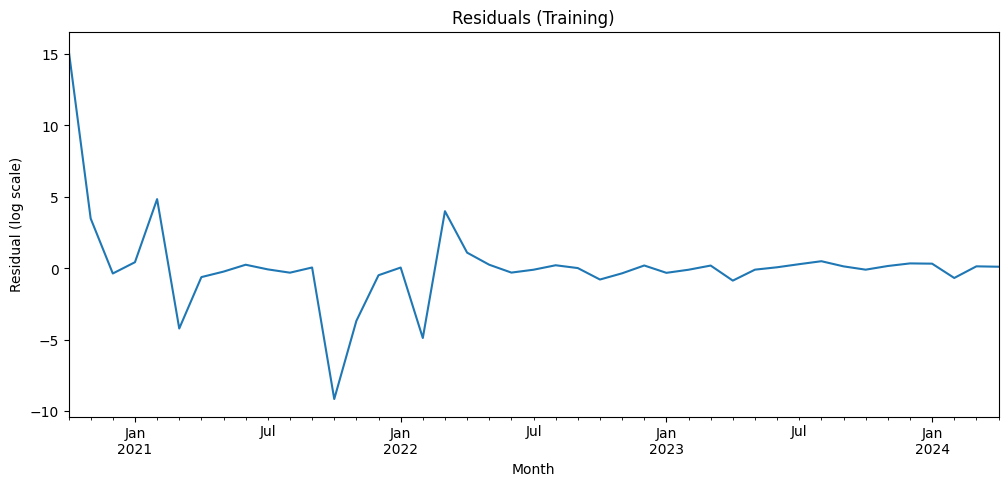

,lb_stat,lb_pvalue
6,6.409582,0.378905
12,18.386422,0.104451


In [22]:
resid = model.resid
ax = pd.Series(resid, index=train_y.index).plot()
ax.set_title("Residuals (Training)")
ax.set_xlabel("Month")
ax.set_ylabel("Residual (log scale)")
plt.show()

acorr_ljungbox(resid, lags=[6,12], return_df=True)

##6 months forecast

In [23]:
final_model = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

h = 6
future = final_model.get_forecast(steps=h)

future_mean = np.expm1(future.predicted_mean)
future_ci   = np.expm1(future.conf_int())

future_index = pd.date_range(
    start=monthly.index.max() + pd.offsets.MonthBegin(1),
    periods=h,
    freq="MS"
)

forecast_df = pd.DataFrame({
    "Forecast_Revenue": future_mean.values,
    "CI_Lower_95": future_ci.iloc[:,0].values,
    "CI_Upper_95": future_ci.iloc[:,1].values
}, index=future_index)

forecast_df

,Forecast_Revenue,CI_Lower_95,CI_Upper_95
2024-11-01,4.276138e+07,2.270796e+07,8.052398e+07
2024-12-01,3.698219e+07,1.958696e+07,6.982616e+07
2025-01-01,3.972633e+07,2.088359e+07,7.557040e+07
2025-02-01,3.176853e+07,1.665863e+07,6.058357e+07
2025-03-01,4.308312e+07,2.251431e+07,8.244334e+07
2025-04-01,2.595854e+07,1.352229e+07,4.983222e+07


## Stakeholder Chart

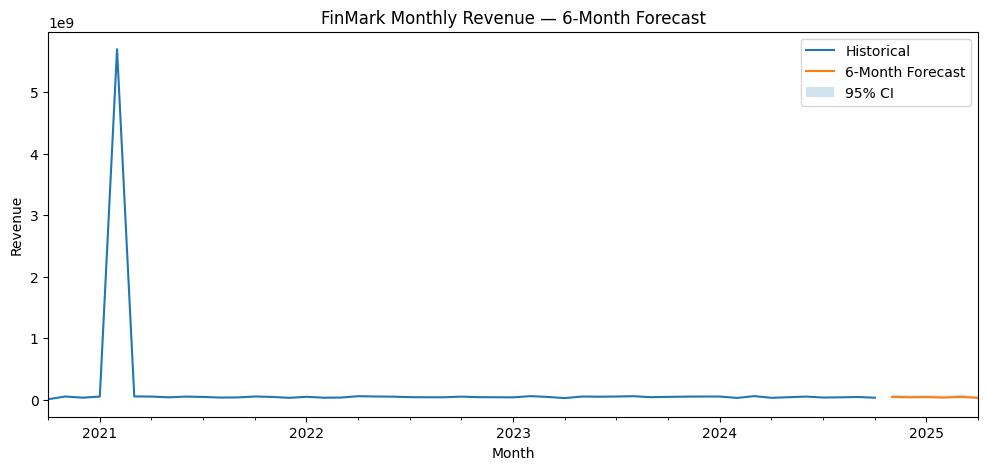

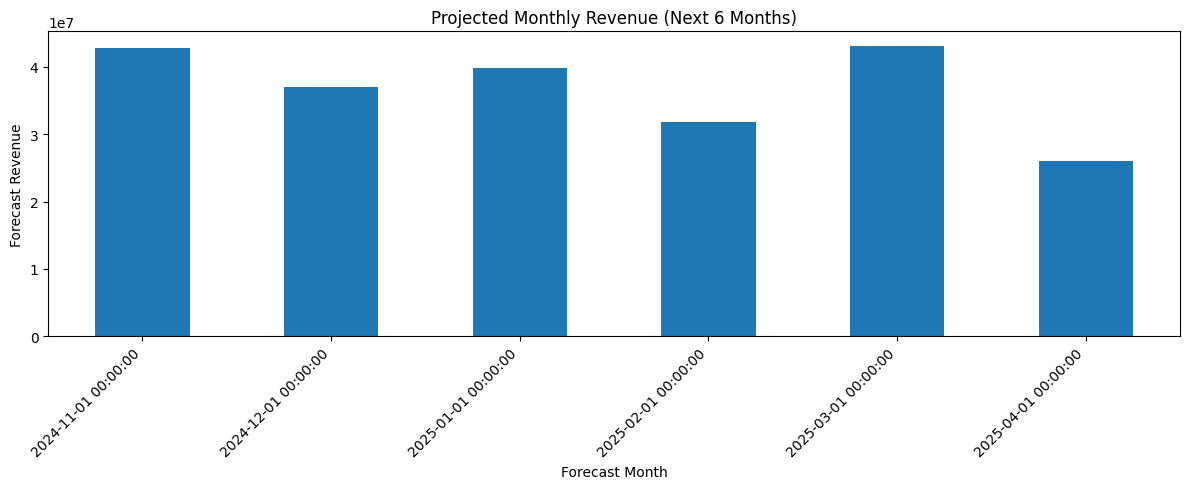

In [24]:
# History + forecast + CI
ax = monthly["Revenue"].plot(label="Historical")
forecast_df["Forecast_Revenue"].plot(ax=ax, label="6-Month Forecast")

ax.fill_between(
    forecast_df.index,
    forecast_df["CI_Lower_95"].values,
    forecast_df["CI_Upper_95"].values,
    alpha=0.2,
    label="95% CI"
)

ax.set_title("FinMark Monthly Revenue — 6-Month Forecast")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
ax.legend()
plt.show()

# Bar chart for projected months
ax = forecast_df["Forecast_Revenue"].plot(kind="bar")
ax.set_title("Projected Monthly Revenue (Next 6 Months)")
ax.set_xlabel("Forecast Month")
ax.set_ylabel("Forecast Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [25]:
forecast_df.to_csv("finmark_6_month_forecast.csv")
monthly.to_csv("finmark_monthly_history.csv")
print("Saved: finmark_6_month_forecast.csv and finmark_monthly_history.csv")

Saved: finmark_6_month_forecast.csv and finmark_monthly_history.csv
